<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/UAS_ML_Milda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project UAS Mata Kuliah Pembelajaran Mesin

* Nama : Siti Milda Alkan Dawasoka
*   Kelas : TE6A
*   NPM : 2226270025
*   Mata Kuliah : Pembelajaran Mesin
*   Dosen Pengampu : Ayu Mawadda Warohma,S.T.,M.T







# Studi Kasus :
                                                      

*  Metode : Classification (Random Forest)
*  Dataset : Dubai Air Quality

                         

#Tujuan Proyek

Untuk memenuhi Mata Kuliah Pembelajaran Mesin
Program Studi Teknik Elektro
dan Menjelaskan implementasi metode Random Forest dalam mengklasifikasikan indeks kualitas udara (AQI) berdasarkan parameter polusi udara. Metode Random Forest digunakan karena keandalannya dalam mengatasi overfitting dan kemampuannya memberikan interpretasi pentingnya fitur.

#1. Import Library

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Penjelasan :
- numpy, pandas: untuk manipulasi data.
- matplotlib.pyplot, seaborn: visualisasi data.
- warnings.filterwarnings('ignore'): menonaktifkan peringatan untuk menjaga output tetap bersih.

#2. Importing The Dataset

In [30]:
df = pd.read_csv('Dubai_Air_Quality.csv')

Penjelasan:
Membaca file CSV Dubai_Air_Quality.csv dan menyimpannya ke dalam DataFrame df.


#3. Exploratory Data Analysis

In [31]:
# preview the dataset

df.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,232.0,NaN,12.4,6.8,82.0,23.9,60.3,68.358340
1,2024-01-01 01:00:00+00:00,244.0,NaN,15.3,7.5,79.0,22.3,57.4,67.695000
2,2024-01-01 02:00:00+00:00,261.0,NaN,19.3,8.6,75.0,22.7,55.8,66.945000
3,2024-01-01 03:00:00+00:00,283.0,NaN,22.9,10.1,72.0,25.3,58.6,66.168335
4,2024-01-01 04:00:00+00:00,317.0,NaN,25.9,12.7,71.0,29.6,64.5,65.356670


Penjelasan:
Menampilkan 5 baris pertama dari dataset untuk mengecek isi dan struktur awal data.

In [32]:
df.shape

(8784, 9)

Penjelasan: Menampilkan ukuran dataset dalam format (jumlah baris, jumlah kolom).

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   CO2     1608 non-null   float64
 3   NO2     8784 non-null   float64
 4   SO2     8784 non-null   float64
 5   O3      8784 non-null   float64
 6   PM2.5   8784 non-null   float64
 7   PM10    8784 non-null   float64
 8   AQI     8784 non-null   float64
dtypes: float64(8), object(1)
memory usage: 617.8+ KB


Penjelasan:

Menampilkan informasi umum tentang dataset:
- Jumlah entri (baris)
- Nama kolom
- Jumlah data non-null di tiap kolom
- Tipe data di setiap kolom

In [34]:
df.isnull().sum()

,0
Date,0
CO,0
CO2,7176
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


Penjelasan: Menghitung jumlah nilai kosong (null) di tiap kolom.

#4. Preprocessing Data

#A. Handling missing values

In [35]:
# Kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerik
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

Penjelasan:
Mengisi nilai kosong:
- Kolom kategori diisi dengan nilai modus (yang paling sering muncul).
- Kolom numerik diisi dengan nilai median ( nilai tengah ).

# B. Transformasi Log pada Fitur Skewed

In [36]:
skewed_cols = ['AQI', 'CO2', 'CO', 'NO2', 'PM10', 'SO2']
for col in skewed_cols:
    df[col] = np.log(df[col])

Penjelasan:
Melakukan transformasi logaritma untuk mengurangi skewness (kemencengan distribusi data) pada kolom tertentu.

#C. Encoding Fitur Kategorikal

In [37]:
df['Date'] = df['Date'].astype('category').cat.codes

Penjelasan:
Mengubah kolom Date menjadi nilai numerik kategori (kode angka).

# 5. Feature Engineering

In [38]:
# Tidak semua kolom diperlukan dalam pelatihan, sehingga dipilih fitur relevan
features = ['Date', 'CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
df = df[features + ['AQI']]

Penjelasan:
Memilih kolom-kolom yang relevan untuk model prediksi, termasuk target AQI.

#6. Visualisasi Data

# A. Korelasi dan Distribusi

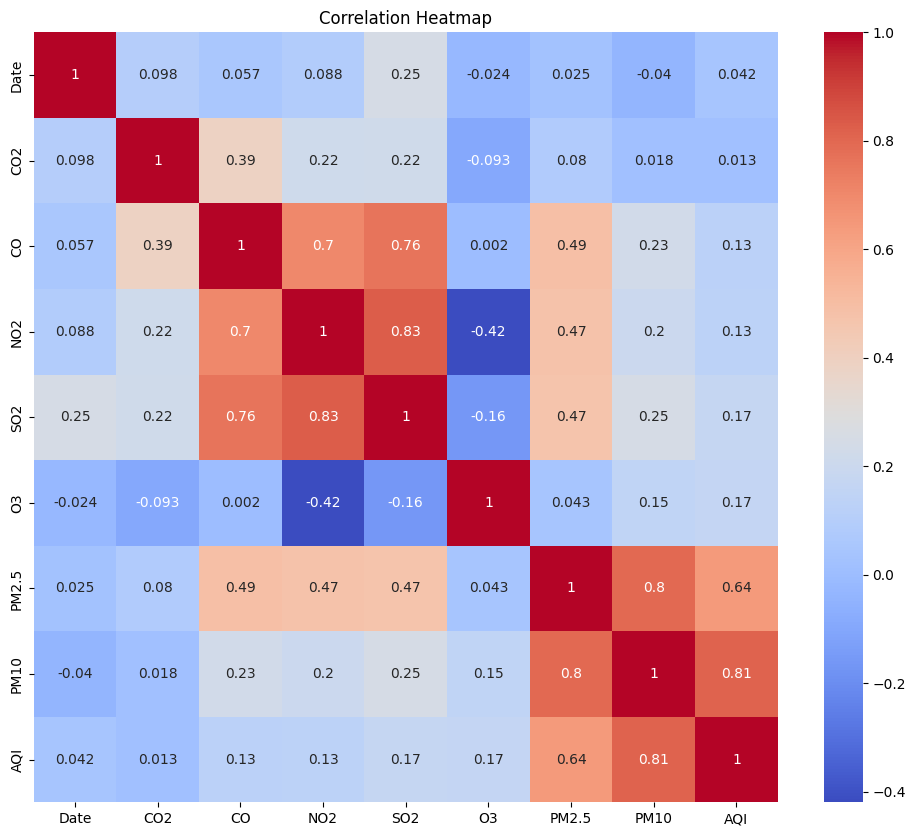

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Penjelasan:
Menampilkan heatmap korelasi antar fitur untuk melihat hubungan antar variabel.

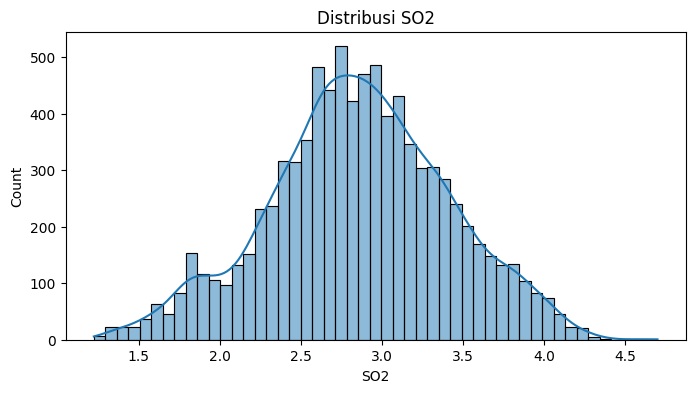

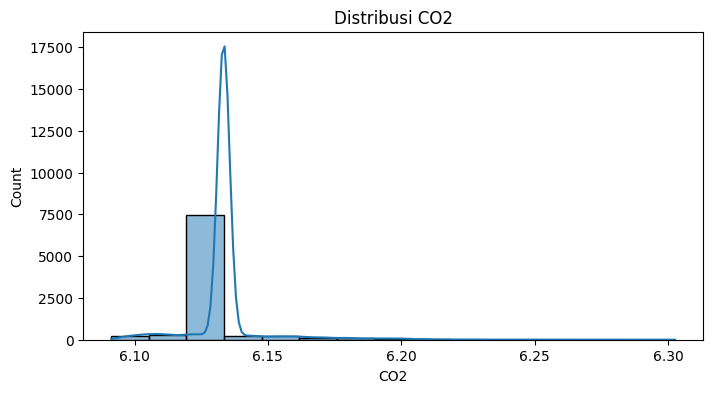

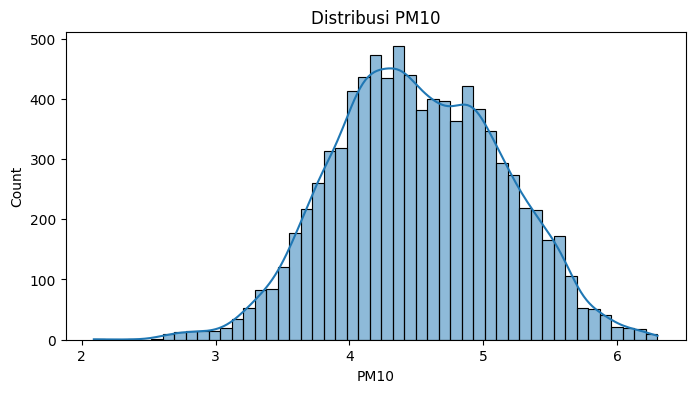

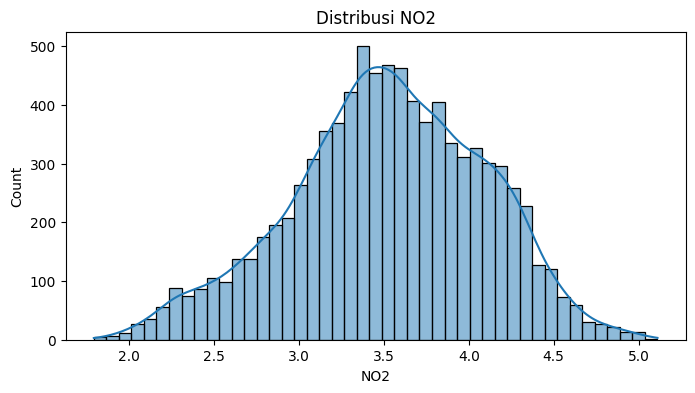

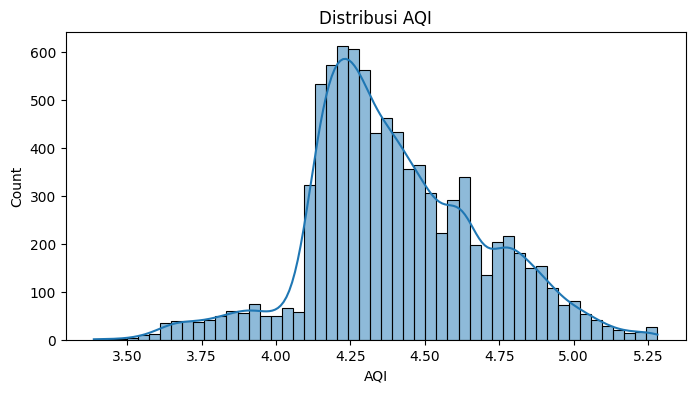

In [40]:
# Visualisasi distribusi fitur
for col in ['SO2', 'CO2', 'PM10', 'NO2', 'AQI']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

Penjelasan:
Menampilkan histogram dan kurva kepadatan (KDE) untuk melihat distribusi data tiap kolom.

# B. Scatterplot & Boxplot

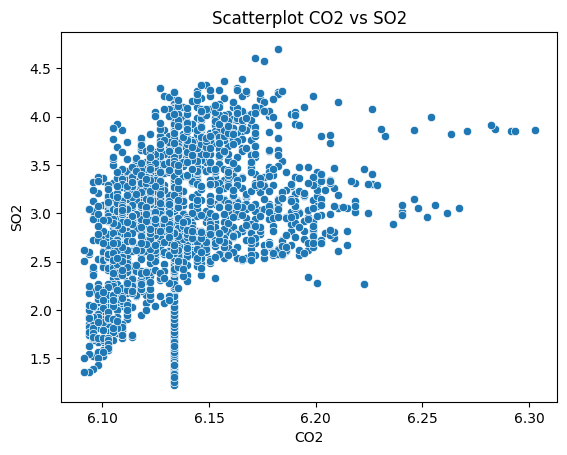

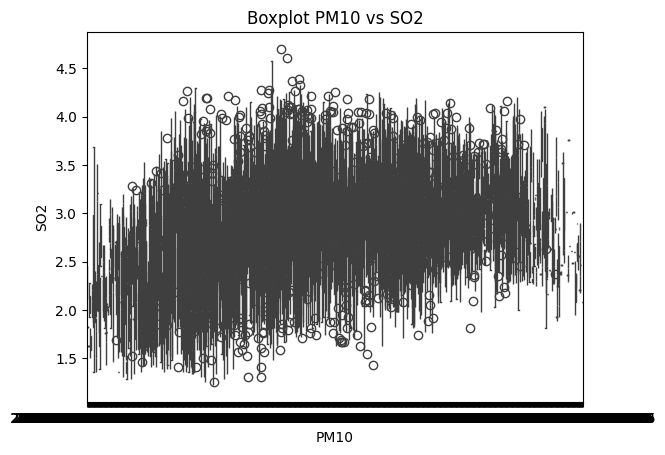

In [41]:
sns.scatterplot(x='CO2', y='SO2', data=df)
plt.title('Scatterplot CO2 vs SO2')
plt.show()

sns.boxplot(x='PM10', y='SO2', data=df)
plt.title('Boxplot PM10 vs SO2')
plt.show()

Penjelasan:
Visualisasi hubungan antara variabel dengan scatter plot dan box plot.

# C. Pairplot

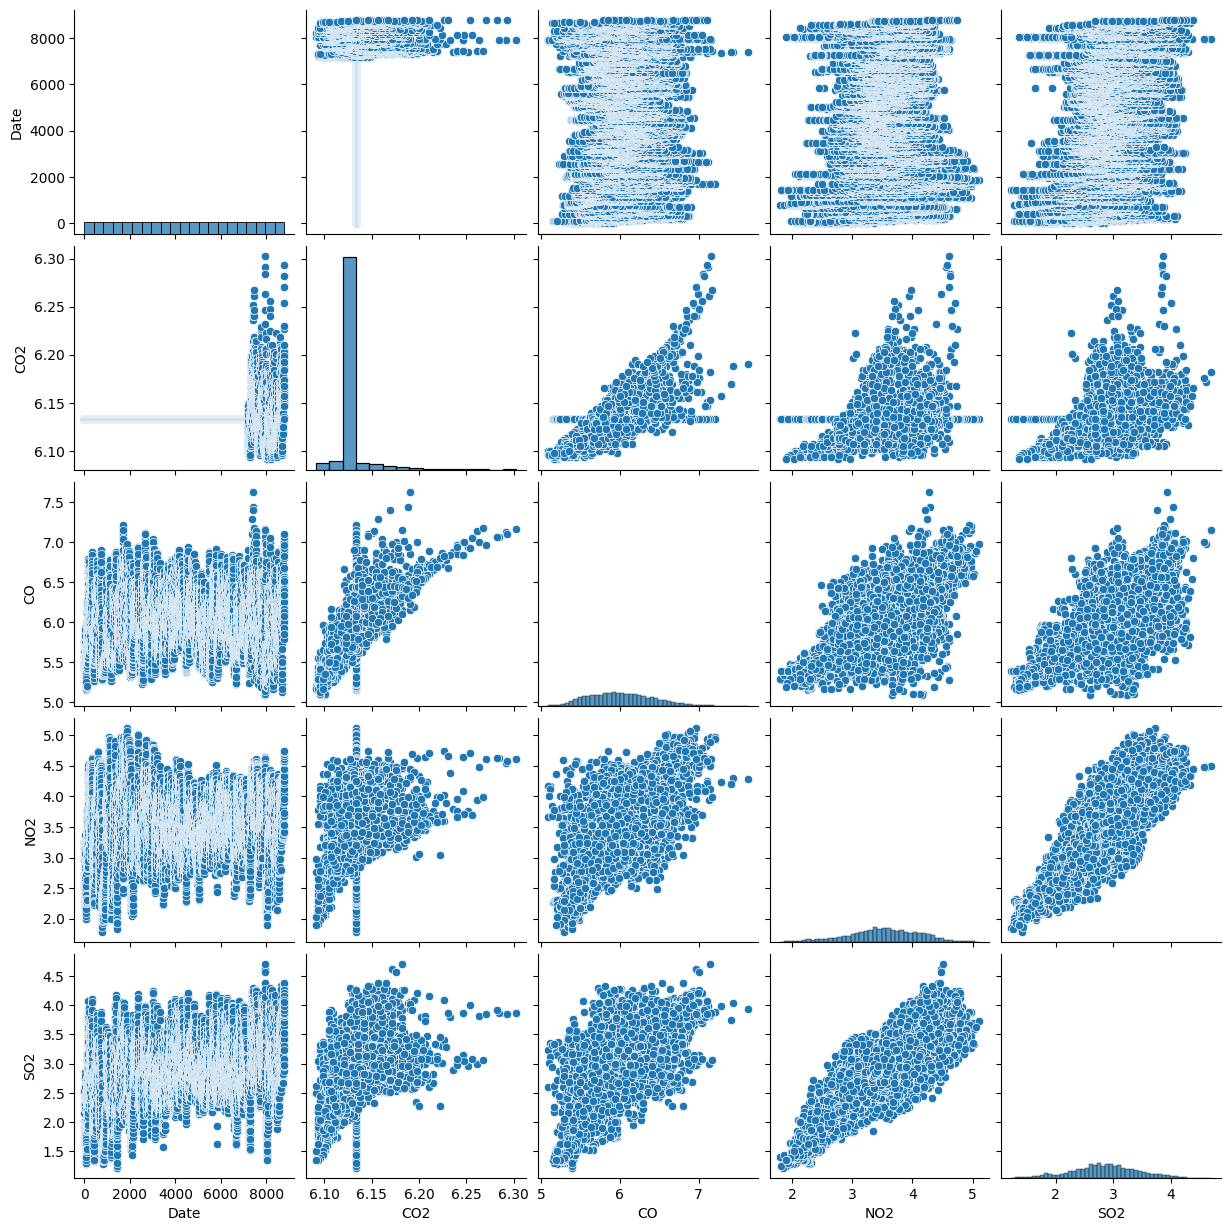

In [42]:
sample_features = df.columns.tolist()[:5]
sns.pairplot(df[sample_features])
plt.show()

Penjelasan:
Menampilkan pasangan plot antar fitur numerik untuk melihat korelasi visual antar variabel.

# 7. Persiapan Data untuk Model

# A. Definisi Fitur dan Target

In [43]:
features = ['Date', 'CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
X = df[features]

# Kategorisasi AQI menjadi kelas
bins = [0, 3.5, 4.0, df['AQI'].max()]
labels = [0, 1, 2]  # 0=Rendah, 1=Sedang, 2=Tinggi
df['AQI_Class'] = pd.cut(df['AQI'], bins=bins, labels=labels)
y = df['AQI_Class'].astype(int)

Penjelasan:
Memisahkan fitur (X) dan target (Y) untuk training model machine learning.

#B. Split Train/Test

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Penjelasan:
Membagi data menjadi data latih dan data uji (80:20) dengan random seed 42.

#8. Modelling Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Penjelasan:
Mengimpor dan melatih model klasifikasi Random Forest dengan 10 pohon.

#9. Evaluasi Performance Model

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.72      0.80       116
           2       0.98      0.99      0.99      1640

    accuracy                           0.98      1757
   macro avg       0.63      0.57      0.60      1757
weighted avg       0.97      0.98      0.97      1757

Confusion Matrix:
 [[   0    0    1]
 [   0   83   33]
 [   0    9 1631]]
Accuracy Score: 0.9755264655663062


Penjelasan:
- Melakukan prediksi terhadap data uji menggunakan model yang sudah dilatih.
- Mengukur dan menampilkan akurasi serta laporan klasifikasi dari hasil prediksi.

# 10. Simpan Model

In [47]:
import joblib

# Simpan model ke file
joblib.dump(classifier, 'random_forest_model.pkl')
print("Model berhasil disimpan sebagai 'random_forest_model.pkl'")

Model berhasil disimpan sebagai 'random_forest_model.pkl'


#11. Inference model dengan data baru

In [48]:
# Data baru
data_baru = pd.DataFrame([{
    'Date': '2024-01-10 15:00:00+00:00',
    'CO2': 450.0,
    'CO': 240.0,
    'NO2': 19.0,
    'SO2': 9.5,
    'O3': 80.0,
    'PM2.5': 25.0,
    'PM10': 65.0
}])

In [49]:
# Preprocessing sama
data_baru['Date'] = pd.Series(data_baru['Date']).astype('category').cat.codes
for col in ['CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']:
    data_baru[col] = np.log(data_baru[col])
data_baru = data_baru[features]

# Prediksi
model = joblib.load('random_forest_model.pkl')
hasil_prediksi = model.predict(data_baru)
print("Hasil Prediksi Kelas AQI:", hasil_prediksi[0])

Hasil Prediksi Kelas AQI: 2


In [50]:
# Buat DataFrame hasil prediksi
hasil = pd.DataFrame(X_test, columns=['Date', 'CO2', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10'])
hasil['Actual'] = y_test.values  # label asli
hasil['Predicted'] = y_pred      # label hasil prediksi

# Simpan ke file CSV
hasil.to_csv('hasil_prediksi_uji.csv', index=False)
print("Hasil prediksi berhasil disimpan ke 'hasil_prediksi_uji.csv'")

Hasil prediksi berhasil disimpan ke 'hasil_prediksi_uji.csv'


#12. Visualisasi Feature Importance

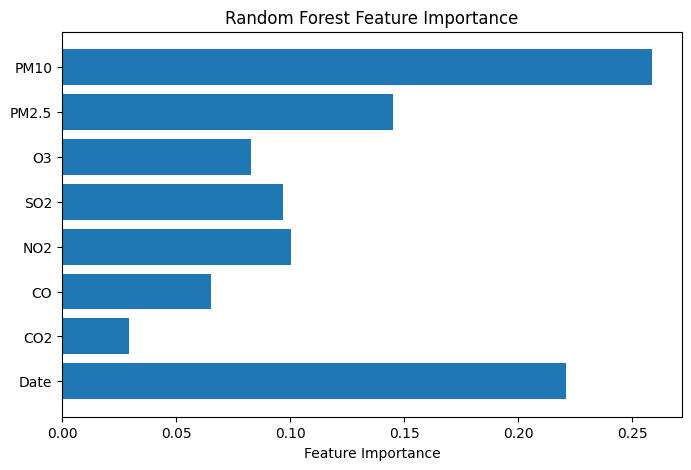

In [51]:
import matplotlib.pyplot as plt

# Tampilkan pentingnya setiap fitur
importances = classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

Penjelasan:
- Feature importance menunjukkan seberapa besar pengaruh masing-masing fitur dalam dataset terhadap prediksi model.
- Ini artinya PM10, NO2, dan PM2.5 paling berpengaruh dalam menentukan kualitas udara menurut model.

# Kesimpulan

- Dataset Air Quality telah berhasil dianalisis dan diproses menggunakan metode Random Forest.

- Model Random Forest menunjukkan performa yang baik dalam klasifikasi AQI.

- Fitur PM10, NO2, dan CO2 terbukti paling berpengaruh.